In [1]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import os
import collections
import re
import string

Using TensorFlow backend.
C:\Users\Tech Land\.conda\envs\pythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Tech Land\.conda\envs\pythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Tech Land\.conda\envs\pythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Tech Land\.conda\envs\p

In [2]:
#importing the sentences
with open('doccuments.txt', 'r') as f:
 reviews = f.read()

In [3]:
#lowercased the sentences
reviews = reviews.lower()
print(reviews)

it's important to realise how disgusting the people around you are
layin n bed with a headache  ughhhh... waitin on your call...
funeral ceremony... gloomy friday...
i should be sleep, but im not! thinking about an old friend who i want. but he's married now. damn, &amp; he wants me 2! scandalous!"
charlene my love. i miss you
i'm sorry  at least it's friday?
ugh! i have to beat this stupid song to get to the next  rude!
if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol
the storm is here and the electricity is gone
so sleepy again and it's not even that late. i fail once again.
how are you convinced that i have always wanted you? what signals did i give off...damn i think i just lost another friend
i'm sorry people are so rude to you, isaac, they should get some manners and know better than to be so lewd!"
fudge.... just bs'd that whole paper.... so tired.... ugh i hate school.....  time to sleep!!!!!!!!!!!
i

In [4]:
#removing the punctuations
from string import punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:

for c in string.punctuation:
 reviews= reviews.replace(c,"")

print(reviews)

its important to realise how disgusting the people around you are
layin n bed with a headache  ughhhh waitin on your call
funeral ceremony gloomy friday
i should be sleep but im not thinking about an old friend who i want but hes married now damn amp he wants me 2 scandalous
charlene my love i miss you
im sorry  at least its friday
ugh i have to beat this stupid song to get to the next  rude
if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol
the storm is here and the electricity is gone
so sleepy again and its not even that late i fail once again
how are you convinced that i have always wanted you what signals did i give offdamn i think i just lost another friend
im sorry people are so rude to you isaac they should get some manners and know better than to be so lewd
fudge just bsd that whole paper so tired ugh i hate school  time to sleep
im having a problem with my photo here in twitter amfcant see my face
so

In [6]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
reviews = remove_pattern(reviews, "@[\w]*")

In [7]:
#splitting the sentences
reviews_split = reviews.split("\n")
print(reviews_split)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'i should be sleep but im not thinking about an old friend who i want but hes married now damn amp he wants me 2 scandalous', 'charlene my love i miss you', 'im sorry  at least its friday', 'ugh i have to beat this stupid song to get to the next  rude', 'if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late i fail once again', 'how are you convinced that i have always wanted you what signals did i give offdamn i think i just lost another friend', 'im sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh i hate school  time to sleep', 'im having a problem with my pho

In [8]:
def removeDigits(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list
reviews = removeDigits(reviews_split)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'i should be sleep but im not thinking about an old friend who i want but hes married now damn amp he wants me  scandalous', 'charlene my love i miss you', 'im sorry  at least its friday', 'ugh i have to beat this stupid song to get to the next  rude', 'if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late i fail once again', 'how are you convinced that i have always wanted you what signals did i give offdamn i think i just lost another friend', 'im sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh i hate school  time to sleep', 'im having a problem with my phot

In [9]:
def removeDigits(list): 
    pattern = 'im '
    list = [re.sub(pattern, '', i) for i in list] 
    return list
reviews = removeDigits(reviews)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'i should be sleep but not thinking about an old friend who i want but hes married now damn amp he wants me  scandalous', 'charlene my love i miss you', 'sorry  at least its friday', 'ugh i have to beat this stupid song to get to the next  rude', 'if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late i fail once again', 'how are you convinced that i have always wanted you what signals did i give offdamn i think i just lost another friend', 'sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh i hate school  time to sleep', 'having a problem with my photo here in tw

In [10]:
def removeDigits(list): 
    pattern = 'i '
    list = [re.sub(pattern, '', i) for i in list] 
    return list
reviews = removeDigits(reviews)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'should be sleep but not thinking about an old friend who want but hes married now damn amp he wants me  scandalous', 'charlene my love miss you', 'sorry  at least its friday', 'ugh have to beat this stupid song to get to the next  rude', 'if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late fail once again', 'how are you convinced that have always wanted you what signals did give offdamn think just lost another friend', 'sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh hate school  time to sleep', 'having a problem with my photo here in twitter amfcant see my f

In [11]:
def removeDigits(list): 
    pattern = ' u '
    list = [re.sub(pattern, ' ', i) for i in list] 
    return list
reviews = removeDigits(reviews)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'should be sleep but not thinking about an old friend who want but hes married now damn amp he wants me  scandalous', 'charlene my love miss you', 'sorry  at least its friday', 'ugh have to beat this stupid song to get to the next  rude', 'if watch the hills in london will realise what tourture it is because were weeks and weeks late  just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late fail once again', 'how are you convinced that have always wanted you what signals did give offdamn think just lost another friend', 'sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh hate school  time to sleep', 'having a problem with my photo here in twitter amfcant see my face'

In [12]:
def removeDigits(list): 
    pattern = ' cant '
    list = [re.sub(pattern, ' ', i) for i in list] 
    return list
reviews = removeDigits(reviews)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'should be sleep but not thinking about an old friend who want but hes married now damn amp he wants me  scandalous', 'charlene my love miss you', 'sorry  at least its friday', 'ugh have to beat this stupid song to get to the next  rude', 'if watch the hills in london will realise what tourture it is because were weeks and weeks late  just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late fail once again', 'how are you convinced that have always wanted you what signals did give offdamn think just lost another friend', 'sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh hate school  time to sleep', 'having a problem with my photo here in twitter amfcant see my face'

In [13]:
def removeDigits(list): 
    pattern = 'cant '
    list = [re.sub(pattern, ' ', i) for i in list] 
    return list
reviews = removeDigits(reviews)
print(reviews)

['its important to realise how disgusting the people around you are', 'layin n bed with a headache  ughhhh waitin on your call', 'funeral ceremony gloomy friday', 'should be sleep but not thinking about an old friend who want but hes married now damn amp he wants me  scandalous', 'charlene my love miss you', 'sorry  at least its friday', 'ugh have to beat this stupid song to get to the next  rude', 'if watch the hills in london will realise what tourture it is because were weeks and weeks late  just watch it online lol', 'the storm is here and the electricity is gone', 'so sleepy again and its not even that late fail once again', 'how are you convinced that have always wanted you what signals did give offdamn think just lost another friend', 'sorry people are so rude to you isaac they should get some manners and know better than to be so lewd', 'fudge just bsd that whole paper so tired ugh hate school  time to sleep', 'having a problem with my photo here in twitter amf see my face', 's

In [14]:
#importing the categories
with open('categories.txt', 'r') as f:
 labels = f.read()

In [15]:
labels = labels.lower()

In [16]:
labels_split = labels.split("\n")
print(labels_split)

['disgusting', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad'

In [17]:
print(len(reviews))

1374


In [18]:
print(len(labels_split))

1374


In [19]:
#tokenizing the categories
import nltk
from nltk import word_tokenize
#nltk.download('punkt')
tokens = [word_tokenize(sen) for sen in reviews]
print(tokens)

[['its', 'important', 'to', 'realise', 'how', 'disgusting', 'the', 'people', 'around', 'you', 'are'], ['layin', 'n', 'bed', 'with', 'a', 'headache', 'ughhhh', 'waitin', 'on', 'your', 'call'], ['funeral', 'ceremony', 'gloomy', 'friday'], ['should', 'be', 'sleep', 'but', 'not', 'thinking', 'about', 'an', 'old', 'friend', 'who', 'want', 'but', 'hes', 'married', 'now', 'damn', 'amp', 'he', 'wants', 'me', 'scandalous'], ['charlene', 'my', 'love', 'miss', 'you'], ['sorry', 'at', 'least', 'its', 'friday'], ['ugh', 'have', 'to', 'beat', 'this', 'stupid', 'song', 'to', 'get', 'to', 'the', 'next', 'rude'], ['if', 'watch', 'the', 'hills', 'in', 'london', 'will', 'realise', 'what', 'tourture', 'it', 'is', 'because', 'were', 'weeks', 'and', 'weeks', 'late', 'just', 'watch', 'it', 'online', 'lol'], ['the', 'storm', 'is', 'here', 'and', 'the', 'electricity', 'is', 'gone'], ['so', 'sleepy', 'again', 'and', 'its', 'not', 'even', 'that', 'late', 'fail', 'once', 'again'], ['how', 'are', 'you', 'convinced

In [20]:
#removing the sop words
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in tokens]


In [21]:
print(filtered_words)

[['important', 'realise', 'disgusting', 'people', 'around'], ['layin', 'n', 'bed', 'headache', 'ughhhh', 'waitin', 'call'], ['funeral', 'ceremony', 'gloomy', 'friday'], ['sleep', 'thinking', 'old', 'friend', 'want', 'hes', 'married', 'damn', 'amp', 'wants', 'scandalous'], ['charlene', 'love', 'miss'], ['sorry', 'least', 'friday'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hills', 'london', 'realise', 'tourture', 'weeks', 'weeks', 'late', 'watch', 'online', 'lol'], ['storm', 'electricity', 'gone'], ['sleepy', 'even', 'late', 'fail'], ['convinced', 'always', 'wanted', 'signals', 'give', 'offdamn', 'think', 'lost', 'another', 'friend'], ['sorry', 'people', 'rude', 'isaac', 'get', 'manners', 'know', 'better', 'lewd'], ['fudge', 'bsd', 'whole', 'paper', 'tired', 'ugh', 'hate', 'school', 'time', 'sleep'], ['problem', 'photo', 'twitter', 'amf', 'see', 'face'], ['sad', 'available', 'us', 'thatd', 'awesome'], ['want', 'buy', 'great', 'album', 'unfortunately', 'dont', 

In [22]:
for i in range(len(filtered_words)):
    filtered_words[i] = ' '.join(filtered_words[i])

filtered_words = filtered_words
print(filtered_words)

['important realise disgusting people around', 'layin n bed headache ughhhh waitin call', 'funeral ceremony gloomy friday', 'sleep thinking old friend want hes married damn amp wants scandalous', 'charlene love miss', 'sorry least friday', 'ugh beat stupid song get next rude', 'watch hills london realise tourture weeks weeks late watch online lol', 'storm electricity gone', 'sleepy even late fail', 'convinced always wanted signals give offdamn think lost another friend', 'sorry people rude isaac get manners know better lewd', 'fudge bsd whole paper tired ugh hate school time sleep', 'problem photo twitter amf see face', 'sad available us thatd awesome', 'want buy great album unfortunately dont hav enuff funds quotlong time noisyquot', 'honestypain blech', 'thinking excited guys move realized sad see go', 'hiion ipod fall asleep', 'dont wan na work tomorrow get paid', 'feels sad coz wasnt able play guys', 'sarahwalterdarn allergies dont like time year never used problem either', 'wish k

In [23]:
print(len(filtered_words))

1374


In [24]:
corpus_df = pd.DataFrame({'tokens': tokens})
corpus_df[320:330]

,tokens
320,"[at, work, at, the, mo, and, its, so, sunny, h..."
321,"[good, morning, off, to, the, gym, go]"
322,"[so, nice, to, be, back, on, bike, commute, al..."
323,"[only, away, for, a, few, hours]"
324,"[id, poke, uon, face, book, but, dont, have, lol]"
325,"[zombie, wrangler, sounds, like, fun, dont, ha..."
326,[yessssss]
327,"[good, morning, from, rsa, twitterverse, pleas..."
328,"[played, w, my, babies, outside, wow, was, in,..."
329,"[am, totally, knackered, and, back, in, the, m..."


In [25]:
all_words_positive = ' '.join(text for text in corpus_df['tokens'])
print(all_words_positive)

TypeError: sequence item 0: expected str instance, list found

In [26]:
from wordcloud import WordCloud,ImageColorGenerator
from matplotlib.pyplot import figure
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt 


wc = WordCloud(background_color='black', height=1500, width=4000).generate(all_words_positive)
plt.figure(figsize=(20,25))
# Display the generated image:
# the matplotlib way:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'all_words_positive' is not defined

In [27]:
#creating a dataframe
corpus_df = pd.DataFrame({'Document': reviews_split,
                          'tokens': filtered_words,
                          'Category': labels_split})
corpus_df = corpus_df[['Document','tokens', 'Category']]
corpus_df[620:622]


,Document,tokens,Category
620,1960352628surprisethejessicasmiaomal im not pa...,surprisethejessicasmiaomal partying tonight,surprised
621,1960353321surpriseicedgems03bex1210 holy crap ...,surpriseicedgemsbex holy crap need see bad got...,surprised


In [28]:
sad = []
happy = []
surprised = []
angry = []
neutral = []
disgusting = []
for l in corpus_df.Category:
    if l == 'sad':
        happy.append(0)
        surprised.append(0)
        angry.append(0)
        neutral.append(0)
        sad.append(1)
        disgusting.append(0)
    elif l == 'happy':
        happy.append(1)
        surprised.append(0)
        angry.append(0)
        neutral.append(0)
        sad.append(0)
        disgusting.append(0)
    elif l == 'surprised':
        happy.append(0)
        surprised.append(1)
        angry.append(0)
        neutral.append(0)
        sad.append(0)
        disgusting.append(0)
    elif l == 'angry':
        happy.append(0)
        surprised.append(0)
        angry.append(1)
        neutral.append(0)
        sad.append(0)
        disgusting.append(0)
    elif l == 'neutral':
        happy.append(0)
        surprised.append(0)
        angry.append(0)
        neutral.append(1)
        sad.append(0)
        disgusting.append(0)
    elif l == 'disgusting':
        happy.append(0)
        surprised.append(0)
        angry.append(0)
        neutral.append(0)
        sad.append(0)
        disgusting.append(1)

In [29]:
corpus_df['happy']= happy
corpus_df['surprised']= surprised
corpus_df['angry']= angry
corpus_df['neutral']= neutral
corpus_df['sad']= sad
corpus_df['disgusting']= disgusting

In [30]:
#fianl dataframe
corpus_df[620:622]

,Document,tokens,Category,happy,surprised,angry,neutral,sad,disgusting
620,1960352628surprisethejessicasmiaomal im not pa...,surprisethejessicasmiaomal partying tonight,surprised,0,1,0,0,0,0
621,1960353321surpriseicedgems03bex1210 holy crap ...,surpriseicedgemsbex holy crap need see bad got...,surprised,0,1,0,0,0,0


In [31]:
print(corpus_df.loc[[1362]])

                                         Document  \
1362  evil people hope they get what they deserve   

                            tokens Category  happy  surprised  angry  neutral  \
1362  evil people hope get deserve    angry      0          0      1        0   

      sad  disgusting  
1362    0           0  


In [32]:
#splitting the dataset
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(corpus_df, test_size=0.10, random_state=42)

In [33]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

58082 words total, with a vocabulary size of 30
Max sentence length is 168


In [34]:
all_test_words = [word for tokens in data_test['tokens'] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test['tokens']]
TEST_VOCAB = sorted(list(set(all_test_words)))
print('%s words total, with a vocabulary size of %s' % (len(all_test_words), len(TEST_VOCAB)))
print('Max sentence length is %s' % max(test_sentence_lengths))

6678 words total, with a vocabulary size of 28
Max sentence length is 194


In [35]:
#loaded GoogleNews wordvector
word2vec = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [36]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [37]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [38]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [39]:
import keras
tokenizer =keras.preprocessing.text.Tokenizer(num_words=None,lower=True, char_level=False,)

tokenizer.fit_on_texts(data_train["tokens"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["tokens"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 3760 unique tokens.


In [40]:
train_cnn_data = keras.preprocessing.sequence.pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [41]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(3761, 300)


In [42]:
test_sequences = tokenizer.texts_to_sequences(data_test["tokens"].tolist())
test_cnn_data = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [43]:
#Yoon Kim model
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [44]:
label_names = ['sad', 'happy','surprised','angry','neutral','disgusting']
y_train = data_train[label_names].values

In [45]:
x_train = train_cnn_data
y_tr = y_train

In [46]:
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding


In [47]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 300)      1128300     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 49, 200)      120200      embedding_1[0][0]                
____________________________________________________________________________________________

In [48]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [49]:
num_epochs = 200
batch_size = 34

In [50]:
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Train on 1112 samples, validate on 124 samples
Epoch 1/200
1112/1112 [==============================] - 5s 5ms/step - loss: 0.4177 - acc: 0.8392 - val_loss: 0.3783 - val_acc: 0.8387
Epoch 2/200
1112/1112 [==============================] - 0s 396us/step - loss: 0.2949 - acc: 0.8780 - val_loss: 0.3346 - val_acc: 0.8629
Epoch 3/200
1112/1112 [==============================] - 0s 393us/step - loss: 0.2034 - acc: 0.9234 - val_loss: 0.3168 - val_acc: 0.8575
Epoch 4/200
1112/1112 [==============================] - 0s 389us/step - loss: 0.1299 - acc: 0.9598 - val_loss: 0.3343 - val_acc: 0.8737
Epoch 5/200
1112/1112 [==============================] - 0s 389us/step - loss: 0.0715 - acc: 0.9835 - val_loss: 0.3605 - val_acc: 0.8669
Epoch 6/200
1112/1112 [==============================] - 0s 390us/step - loss: 0.0448 - acc: 0.9925 - val_loss: 0.3436 - val_acc: 0.8817
Epoch 7/200
1112/1112 [==============================] - 0s 392us/step - loss: 0.0278 - acc: 0.9951 - val_loss: 0.4034 - val_acc: 0.8

1112/1112 [==============================] - 0s 385us/step - loss: 0.0032 - acc: 0.9982 - val_loss: 0.7176 - val_acc: 0.8750
Epoch 61/200
1112/1112 [==============================] - 0s 390us/step - loss: 0.0027 - acc: 0.9987 - val_loss: 0.7250 - val_acc: 0.8763
Epoch 62/200
1112/1112 [==============================] - 0s 390us/step - loss: 0.0029 - acc: 0.9985 - val_loss: 0.7388 - val_acc: 0.8763
Epoch 63/200
1112/1112 [==============================] - 0s 389us/step - loss: 0.0028 - acc: 0.9987 - val_loss: 0.7029 - val_acc: 0.8737
Epoch 64/200
1112/1112 [==============================] - 0s 390us/step - loss: 0.0035 - acc: 0.9985 - val_loss: 0.7204 - val_acc: 0.8723
Epoch 65/200
1112/1112 [==============================] - 0s 388us/step - loss: 0.0032 - acc: 0.9984 - val_loss: 0.6929 - val_acc: 0.8750
Epoch 66/200
1112/1112 [==============================] - 0s 389us/step - loss: 0.0029 - acc: 0.9985 - val_loss: 0.7161 - val_acc: 0.8750
Epoch 67/200
1112/1112 [=======================

1112/1112 [==============================] - 0s 400us/step - loss: 0.0033 - acc: 0.9982 - val_loss: 0.8419 - val_acc: 0.8763
Epoch 120/200
1112/1112 [==============================] - 0s 417us/step - loss: 0.0027 - acc: 0.9985 - val_loss: 0.8455 - val_acc: 0.8737
Epoch 121/200
1112/1112 [==============================] - 0s 396us/step - loss: 0.0026 - acc: 0.9988 - val_loss: 0.8466 - val_acc: 0.8777
Epoch 122/200
1112/1112 [==============================] - 0s 396us/step - loss: 0.0029 - acc: 0.9982 - val_loss: 0.8356 - val_acc: 0.8777
Epoch 123/200
1112/1112 [==============================] - 0s 392us/step - loss: 0.0028 - acc: 0.9985 - val_loss: 0.8332 - val_acc: 0.8790
Epoch 124/200
1112/1112 [==============================] - 0s 393us/step - loss: 0.0027 - acc: 0.9987 - val_loss: 0.8289 - val_acc: 0.8777
Epoch 125/200
1112/1112 [==============================] - 0s 395us/step - loss: 0.0027 - acc: 0.9985 - val_loss: 0.8325 - val_acc: 0.8777
Epoch 126/200
1112/1112 [================

1112/1112 [==============================] - 0s 400us/step - loss: 0.0028 - acc: 0.9981 - val_loss: 0.8552 - val_acc: 0.8750
Epoch 179/200
1112/1112 [==============================] - 0s 403us/step - loss: 0.0030 - acc: 0.9984 - val_loss: 0.8575 - val_acc: 0.8777
Epoch 180/200
1112/1112 [==============================] - 0s 409us/step - loss: 0.0030 - acc: 0.9982 - val_loss: 0.9203 - val_acc: 0.8763
Epoch 181/200
1112/1112 [==============================] - 0s 401us/step - loss: 0.0067 - acc: 0.9978 - val_loss: 0.7148 - val_acc: 0.8656
Epoch 182/200
1112/1112 [==============================] - 0s 404us/step - loss: 0.0104 - acc: 0.9961 - val_loss: 0.8342 - val_acc: 0.8777
Epoch 183/200
1112/1112 [==============================] - 0s 410us/step - loss: 0.0089 - acc: 0.9963 - val_loss: 0.9450 - val_acc: 0.8790
Epoch 184/200
1112/1112 [==============================] - 0s 408us/step - loss: 0.0053 - acc: 0.9979 - val_loss: 0.8273 - val_acc: 0.8750
Epoch 185/200
1112/1112 [================

In [51]:
model.save_weights('YoonKimWeights.h5')

In [52]:
# save model and weights

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [53]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
model = loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_train, y_tr, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 98.71%


In [54]:
predictions = loaded_model.predict(test_cnn_data, batch_size=1024, verbose=1)

138/138 [==============================] - 0s 1ms/step


In [55]:
submission_df = pd.DataFrame(columns=['Document'] + label_names)
submission_df['Document'] = data_test['Document'].values 
submission_df[label_names] = predictions
submission_df.to_csv("./cnn_submission.csv", index=False)

In [56]:

labels = ['sad', 'happy','surprised','angry','neutral','disgusting']

In [57]:

prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [58]:
sum(data_test.Category==prediction_labels)/len(prediction_labels)

0.43478260869565216

In [59]:
data_test.Category.value_counts()

surprised     34
angry         29
happy         28
neutral       23
sad           18
disgusting     6
Name: Category, dtype: int64

In [60]:
from sklearn.externals import joblib

C:\Users\Tech Land\.conda\envs\pythonGPU\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [59]:
hist = joblib.load('sentimental_analysis.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'sentimental_analysis.joblib'

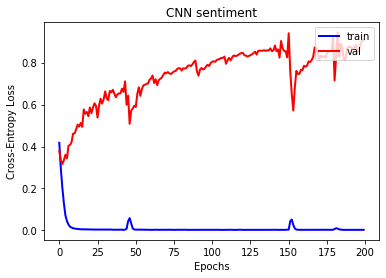

In [61]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

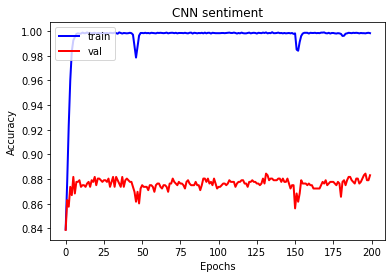

In [62]:
plt.figure()
plt.plot(hist.history['acc'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()


In [63]:
score, acc = loaded_model.evaluate(test_cnn_data, data_test[label_names].values, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)
 

138/138 [==============================] - 1s 6ms/step
Test score: 1.3255714368129121
Test accuracy: 0.834541059922481


In [64]:
print(confusion_matrix(data_test[label_names].values,predictions))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [869]:
str = input("Enter your text here")

Enter your text hereit is a breathing place so it is enjoyable


In [870]:
reviews = str.lower()
print(reviews)

it is a breathing place so it is enjoyable


In [871]:
reviews = reviews.split()
print(reviews)

['it', 'is', 'a', 'breathing', 'place', 'so', 'it', 'is', 'enjoyable']


In [872]:
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in reviews]
print(stripped)

['it', 'is', 'a', 'breathing', 'place', 'so', 'it', 'is', 'enjoyable']


In [873]:
# from nltk.corpus import stopwords
# stoplist = stopwords.words('english')
filtered = [[w for w in stripped ]]
# print(filtered)

In [874]:
corpus_df2 = pd.DataFrame({'Document': str,
                          'tokens':filtered})
corpus_df2

,Document,tokens
0,it is a breathing place so it is enjoyable,"[it, is, a, breathing, place, so, it, is, enjo..."


In [875]:
                         
all_test_words = [word for tokens in corpus_df2['tokens'] for word in tokens]
#test_sentence_lengths = [len(tokens) for tokens in data_test['tokens']]
TEST_VOCAB = sorted(list(set(all_test_words)))
print('%s words total, with a vocabulary size of %s' % (len(all_test_words), len(TEST_VOCAB)))
#print('Max sentence length is %s' % max(test_sentence_lengths))

9 words total, with a vocabulary size of 7


In [876]:
from nltk import word_tokenize
test2_sequences = tokenizer.texts_to_sequences(corpus_df2["tokens"].tolist())
test2_cnn_data = keras.preprocessing.sequence.pad_sequences(test2_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [877]:
predictions = loaded_model.predict(test2_cnn_data, batch_size=2, verbose=1)

1/1 [==============================] - 0s 289ms/step


In [878]:
predictions

array([[8.9108944e-06, 2.1946630e-01, 8.9406967e-08, 5.9111714e-03,
        4.3059108e-01, 3.5442292e-07]], dtype=float32)

In [879]:
labels = ['sad', 'happy','surprised','angry','neutral','disgusting']
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [880]:
prediction_labels

['neutral']